#**1**.**Idea**



The embeddings method (and generally the language model theory) is based on the idea that words can be predicted by their contextual neighbourhood. Althougth the idea is promising and works pretty well, there are certain cases where this assumption seems no to be of any use for language modelling. This is particulary true for those kind of words or sequences that are not expected to be in any (obvious) close semantical relation to any other words or sequences in a text. One example of this are parenthetical constructions. The term "paranthesis" is used to refer to phrases that are brought into the sentence to express an additional (often attitudinal) information and are not syntactically conected to the rest of the expression, althogh have some kind of pragmatic association with it. An example of a sentece with parenthesis in Russian is given in (1):

(1) *Настоящая женщина ― это, прежде всего, добрая женщина.* [коллективный. Форум: Мужчина в школе (Взгляд на Мужчину в школе снаружи и изнутри) (2011)]

The paranthetical construction in (1) is *прежде всего*, that adds information on the author's attitude to the content of the expression.

At the same time parenthetical constructions are least studied units of syntax both typologucally and language particulary. Thus, there are no satisfactory fuctonal classification of Russian paranthetical constructions at this time.

In this work I follow the two following objectives:

▶  To explore the syntactic variance of paranthetical constructions in Russian.

▶  To check if it is possible to classify parentheticals according to their meaning/function beased on the embeddings vectors.

The data for this research comes from Ruccian National Corpus.



The code below is for downloading and importation of the important packages.

In [ ]:
!pip install pymorphy2
!pip install natasha
import re
import operator
from string import punctuation
from pymystem3 import Mystem
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from nltk.corpus import stopwords
from gensim.models import word2vec
from pymorphy2 import MorphAnalyzer

import warnings
warnings.filterwarnings('ignore')
import collections

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import spacy
import scipy
from string import punctuation
import pymorphy2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23
from collections import Counter

In [ ]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
import nltk
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz



     |████████████████████████████████| 15.9 MB 532 kB/s 
     |████████████████████████████████| 5.9 MB 2.5 MB/s 
     |████████████████████████████████| 10.1 MB 18.7 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 451 kB 31.1 MB/s 
     |████████████████████████████████| 628 kB 51.2 MB/s 
  Created wheel for ru-core-news-sm: filename=ru_core_news_sm-3.1.0-py3-none-any.whl size=16086411 sha256=c038d3bf51bd053e27228e9599b1939f787c68e2fb27d40098cbb37bb29030c6
  Stored in directory: /root/.cache/pip/wheels/98/a7/44/ee07931d9211e738e3b23f0321c9ff7a7ee2ffcad9946a9e07
Successfully built ru-core-news-sm
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc

In [ ]:
! pip install dostoevsky

     |████████████████████████████████| 68 kB 2.5 MB/s 
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3126228 sha256=9cad33356927874c2dadc0dc6f1d492c7b4528f1b5ab587fe556adeddb5d444b
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
m = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


#**2.Data and pre-pocessing**

To get a sufficient amount of paretheticals without additional work I deciced to download a sample with the contexts from RNC. Thus, the dafaframe that I am going to use in this work is based on the raw sample from RNC obtained with the help of the following query:

mw:PARENTH

To achieve homogeneity on temporal dimension I only considered examples from the texts written between 1950 and 2015. Since RNC does not allow to download the whole sample, I downloaded the maximum allowed in each 10 years (sorting the examples randomly beforehand).

This way of getting data means that the sample used here contains constructions that were labeled as parentheticals by a syntactic parser used in RNC and then either approved (омонимия снята) or left without cheking (омонимия не снята) by a human coder. This decision, althogh allowing to collect a large sample of data almost for free, has a number of disadvantages. Among which the most crutial one is the (externally) pre-defined set of constructions taken into account. However, this also allows to make the sample most representative.

In [ ]:
df = pd.read_csv("paranth2.csv", sep = ";")
df

,Center,Sphere,Type,Ambiguity,Full context
0,как,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...
1,говорится,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...
2,как,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...
3,говорится,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...
4,Прежде,нехудожественная | публицистика,статья,омонимия снята,"― ""Но Максимке нужен друг! "" ― ""Прежде всего е..."
...,...,...,...,...,...
47280,дело,художественная,анекдот,омонимия не снята,Ясное дело пострелять там контрольный в голову...
47281,меж,нехудожественная | публицистика,статья,омонимия не снята,Ястреб меж тем кружа надо мною все еще зловеще...
47282,тем,нехудожественная | публицистика,статья,омонимия не снята,Ястреб меж тем кружа надо мною все еще зловеще...
47283,вообще,нехудожественная | публицистика,статья,омонимия не снята,Ястребы были обнаружены в ручном багаже случай...


As can be seen from the dataframe, the raw sample from RNC is not adequately organised. So, in case of multiple word construction each word is marked separately and is represented as a separate row. This is highly inconvinient, so we need to pre-process the row sample before explpring it. First, lets make sure we do not have any duplicates.

In [ ]:
df.drop_duplicates(subset=['Full context', 'Center', 'Type'], inplace=True)

,Center,Sphere,Type,Ambiguity,Full context
0,как,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...
1,говорится,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...
4,Прежде,нехудожественная | публицистика,статья,омонимия снята,"― ""Но Максимке нужен друг! "" ― ""Прежде всего е..."
5,всего,нехудожественная | публицистика,статья,омонимия снята,"― ""Но Максимке нужен друг! "" ― ""Прежде всего е..."
6,к,художественная,роман,омонимия не снята,― «А того что я и сам был поваром и знаю что к...
...,...,...,...,...,...
47276,дело,художественная,анекдот,омонимия не снята,Ясное дело пострелять там контрольный в голову...
47281,меж,нехудожественная | публицистика,статья,омонимия не снята,Ястреб меж тем кружа надо мною все еще зловеще...
47282,тем,нехудожественная | публицистика,статья,омонимия не снята,Ястреб меж тем кружа надо мною все еще зловеще...
47283,вообще,нехудожественная | публицистика,статья,омонимия не снята,Ястребы были обнаружены в ручном багаже случай...


Now we need to join parts of multi-word expressions to one line.

In [ ]:
limit = len(df["Full context"].to_list())-2
limit

32691

In [ ]:
parataxs = []
i = 0
while i < limit:
    paratax = []
    for n in range(20):
        if df["Full context"].to_list()[i+n] == df["Full context"].to_list()[i]:
            paratax.append(str(df["Center"].to_list()[i+n]))
        else:
            if n == 1:
                paratax.append(str(df["Center"].to_list()[i]))
            else:
                break
    i = i+n
    parataxs.append(" ".join(paratax))

In [ ]:
After we have got a lsit of all exressions, we cal drop all the dubling lines.

In [ ]:
df.drop_duplicates(subset=['Full context'], inplace=True)
df

,Center,Sphere,Type,Ambiguity,Full context
0,как,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...
4,Прежде,нехудожественная | публицистика,статья,омонимия снята,"― ""Но Максимке нужен друг! "" ― ""Прежде всего е..."
6,к,художественная,роман,омонимия не снята,― «А того что я и сам был поваром и знаю что к...
18,Видите,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,― «Видите ли Сергей Васильевич ― беззащитно ул...
20,может,нехудожественная | публицистика,статья,омонимия не снята,― «Врачи драматизируют» «ерунда ошибка в диагн...
...,...,...,...,...,...
47263,может,художественная,рассказ,омонимия не снята,Ясно что район имевший в центре и повсеместно ...
47271,Ясное,публицистика,статья,омонимия не снята,Ясное дело государство всегда пыталось ― и как...
47275,Ясное,художественная,анекдот,омонимия не снята,Ясное дело пострелять там контрольный в голову...
47281,меж,нехудожественная | публицистика,статья,омонимия не снята,Ястреб меж тем кружа надо мною все еще зловеще...


Then let us add an updated column with full expressions and delite the old one.

In [ ]:
df["Paratax"] = parataxs

In [ ]:
del df["Center"]
df

,Sphere,Type,Ambiguity,Full context,Paratax
0,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...,как говорится
4,нехудожественная | публицистика,статья,омонимия снята,"― ""Но Максимке нужен друг! "" ― ""Прежде всего е...",Прежде всего
6,художественная,роман,омонимия не снята,― «А того что я и сам был поваром и знаю что к...,к чему
18,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,― «Видите ли Сергей Васильевич ― беззащитно ул...,Видите ли
20,нехудожественная | публицистика,статья,омонимия не снята,― «Врачи драматизируют» «ерунда ошибка в диагн...,может быть
...,...,...,...,...,...
47263,художественная,рассказ,омонимия не снята,Ясно что район имевший в центре и повсеместно ...,может быть
47271,публицистика,статья,омонимия не снята,Ясное дело государство всегда пыталось ― и как...,Ясное дело как правило
47275,художественная,анекдот,омонимия не снята,Ясное дело пострелять там контрольный в голову...,Ясное дело
47281,нехудожественная | публицистика,статья,омонимия не снята,Ястреб меж тем кружа надо мною все еще зловеще...,меж тем


To explore the parantheticals I decided to coun number of words in each construction.

In [ ]:
df1 = df.assign(length = df.Paratax.apply(lambda x: len(x.split(' '))))

In [ ]:
df1[df1["length"]>5]

,Sphere,Type,Ambiguity,Full context,Paratax,length
2106,публицистика,интервью,омонимия не снята,― На наш взгляд критерии выживания и успешност...,На наш взгляд с точки зрения,6
2855,художественная,рассказ,омонимия не снята,― Свет-то вот видишь зажегся ведь от ударов ― ...,может быть чем черт не шутит,6
5514,нехудожественная | электронная коммуникация,форум,омонимия не снята,[Nikolay nick] Я честно говоря думал не об эк...,честно говоря скорее всего может быть,6
6535,нехудожественная | электронная коммуникация,форум,омонимия не снята,[Горожанка жен] Кроме того пользоваться банко...,Кроме того к тому же в этом случае,8
7793,нехудожественная | публицистика,заметка,омонимия не снята,«Мы думаем что малые региональные банки которы...,как правило В то же время,6
9161,нехудожественная | публицистика,заметка,омонимия не снята,А поскольку далеко не всегда человек прослывши...,на самом деле в этом случае,6
10309,художественная,рассказ,омонимия не снята,Было ей хорошо за семьдесят и она выглядела на...,в то же время на самом деле,7
10318,художественная,повесть,омонимия не снята,Было ли это причудливое сложение траекторий ка...,в самом деле так или иначе,6
11626,нехудожественная | публицистика,статья,омонимия снята,В самом деле сигнал по всей вероятности не зас...,В самом деле по всей вероятности,6
12302,публицистика,статья,омонимия не снята,В то же время мы отдаем себе отчет что к сожал...,В то же время к сожалению,6


As can bee seen from the table above, there were axamples in the sample where there were more than one parenthetical pre context. To filter these cases let's devide all the long sequences (longer than 4 words) manually.

In [ ]:
def expression(x):
    express = []
    if len(x.split()) > 4:
        print(x)
        div = input ('Split the expressions manually dividing by comma:')
        exprs = div.split(',')
        express.append(exprs)
    else:
        express.append(x)
    return express

In [ ]:
df2 = df.assign(Paratax_joined = df1.Paratax.apply(lambda x: expression(x)))

Видишь ли к тому же
Split the expressions manually dividing by comma:видишь ли, к тому же
мне кажется так или иначе
Split the expressions manually dividing by comma:мне кажется, так или иначе
К тому же кроме того
Split the expressions manually dividing by comma:к тому же, кроме того
кроме того с точки зрения
Split the expressions manually dividing by comma:кроме того, с точки зрения
прежде всего на ваш взгляд
Split the expressions manually dividing by comma:прежде всего, на наш взгляд
На наш взгляд с точки зрения
Split the expressions manually dividing by comma:на наш взгляд, с точки зрения
На самом деле может быть
Split the expressions manually dividing by comma:на самом деле, может быть
Прежде всего на наш взгляд
Split the expressions manually dividing by comma:прежде всего, на наш взгляд
может быть чем черт не шутит
Split the expressions manually dividing by comma:может быть, чем черт не шутит
к примеру на самом деле
Split the expressions manually dividing by comma:у примеру, на сам

In [ ]:
def correction(x): 
  for i in x:
        if str(type(i)) == "<class 'list'>":
            res= x[0]
            print(x[0])
        else:
            res = x
  return res

In [ ]:
df5 = df2.assign(Paratax_splitted = df2.Paratax_joined.apply(lambda x: correction(x)))

['видишь ли', ' к тому же']
['мне кажется', ' так или иначе']
['к тому же', ' кроме того']
['кроме того', ' с точки зрения']
['прежде всего', ' на наш взгляд']
['на наш взгляд', ' с точки зрения']
['на самом деле', ' может быть']
['прежде всего', ' на наш взгляд']
['может быть', ' чем черт не шутит']
['у примеру', ' на самом деле']
['конечно же', ' в самом деле']
['как бы то ни было']
['на самом деле', ' в принципее']
['мне казалось', ' в общем']
['на мой взгляд', ' конечно же']
['честно говоря', ' скорее всего', ' может быть']
['к тому же', ' мягко говоря']
['таким образом', ' в моем случае']
['кроме того', ' к тому же', ' в этом случае']
['не к ночи будь помянут']
['как правило', ' в то же время']
['на самом деле', ' как правило']
['в нашем случае', ' должно быть']
['к тому же']
['на самом деле', ' в этом случае']
['прежде всего', ' с точки зрения']
['по его мнению', ' может быть']
['в то же время', ' на самом деле']
['в самом деле', ' так или инач']
['быть может', ' во всяком случае

Now the parntheticals from the same contexts are in different columns:

In [ ]:
df6 = df5.Paratax_splitted.apply(pd.Series)\
    .merge(df2, left_index = True, right_index = True)

,0,1,2,Sphere,Type,Ambiguity,Full context,Paratax,Paratax_joined
0,как говорится,NaN,NaN,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...,как говорится,[как говорится]
4,Прежде всего,NaN,NaN,нехудожественная | публицистика,статья,омонимия снята,"― ""Но Максимке нужен друг! "" ― ""Прежде всего е...",Прежде всего,[Прежде всего]
6,к чему,NaN,NaN,художественная,роман,омонимия не снята,― «А того что я и сам был поваром и знаю что к...,к чему,[к чему]
18,Видите ли,NaN,NaN,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,― «Видите ли Сергей Васильевич ― беззащитно ул...,Видите ли,[Видите ли]
20,может быть,NaN,NaN,нехудожественная | публицистика,статья,омонимия не снята,― «Врачи драматизируют» «ерунда ошибка в диагн...,может быть,[может быть]
...,...,...,...,...,...,...,...,...,...
47263,может быть,NaN,NaN,художественная,рассказ,омонимия не снята,Ясно что район имевший в центре и повсеместно ...,может быть,[может быть]
47271,Ясное дело как правило,NaN,NaN,публицистика,статья,омонимия не снята,Ясное дело государство всегда пыталось ― и как...,Ясное дело как правило,[Ясное дело как правило]
47275,Ясное дело,NaN,NaN,художественная,анекдот,омонимия не снята,Ясное дело пострелять там контрольный в голову...,Ясное дело,[Ясное дело]
47281,меж тем,NaN,NaN,нехудожественная | публицистика,статья,омонимия не снята,Ястреб меж тем кружа надо мною все еще зловеще...,меж тем,[меж тем]


Since there are not so many data in the columns 1 and 2, we better delete it to focus on the analysis asap.

In [ ]:
del df6[1, 2]

Now, I will rename the obtained to column to be able to refere to it quickly.

In [ ]:
df7 = df6.rename(columns = {0:"expression"})

In [ ]:
df7

,expression,Sphere,Type,Ambiguity,Full context
0,как говорится,публицистика,мемуары,омонимия не снята,― короче в соседнем кабинете обнаружился моло...
4,Прежде всего,нехудожественная | публицистика,статья,омонимия снята,"― ""Но Максимке нужен друг! "" ― ""Прежде всего е..."
6,к чему,художественная,роман,омонимия не снята,― «А того что я и сам был поваром и знаю что к...
18,Видите ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,― «Видите ли Сергей Васильевич ― беззащитно ул...
20,может быть,нехудожественная | публицистика,статья,омонимия не снята,― «Врачи драматизируют» «ерунда ошибка в диагн...
...,...,...,...,...,...
47263,может быть,художественная,рассказ,омонимия не снята,Ясно что район имевший в центре и повсеместно ...
47271,Ясное дело как правило,публицистика,статья,омонимия не снята,Ясное дело государство всегда пыталось ― и как...
47275,Ясное дело,художественная,анекдот,омонимия не снята,Ясное дело пострелять там контрольный в голову...
47281,меж тем,нехудожественная | публицистика,статья,омонимия не снята,Ястреб меж тем кружа надо мною все еще зловеще...


Let us see what is the part of the speech of the head constituent in each parenthetical construction in our dataframe.

In [ ]:
def pos(x):
  d = nlp(str(x))
  for token in d:
    dep = token.dep_
    if dep == "ROOT":
      res = token.pos_
  if 'res' not in locals():
    res = 'undefined'
  return res

In [ ]:
df8 = df7.assign(Paratax_pos = df7.expression.apply(lambda x: pos(x)))

It is also time to prepate the contexts for further vectorixation. I decided not to lemmatize the texts in order to preserve some syntactic structure, which can be important for parantheticals.

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[-/―/(){}\[\]\|@,;/!/"/«/»]')
STOPWORDS = set(stopwords.words('russian'))

def text_replace(text):
  match = REPLACE_BY_SPACE_RE.findall(text)
  for m in match:
    text = text.replace(m,'')
  return(text)

In [ ]:
def preproc(x):
  x1 = x.lower()
  x2 = text_replace(x1)
  return x2

In [ ]:
df8['Context'] = df8['Full context'].apply(lambda x: preproc(x))

In [ ]:
df8["expression"] = df8["expression"].apply(lambda x: x.lower())

In [ ]:
df8['lenght'] = df8["expression"].apply(lambda x: len(x.split(' ')))

In [ ]:
df8

,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght
0,как говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2
4,прежде всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2
6,к чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2
18,видите ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2
20,может быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2
...,...,...,...,...,...,...,...
47263,может быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2
47271,ясное дело как правило,публицистика,статья,омонимия не снята,NOUN,ясное дело государство всегда пыталось и как ...,4
47275,ясное дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2
47281,меж тем,нехудожественная | публицистика,статья,омонимия не снята,PRON,ястреб меж тем кружа надо мною все еще зловеще...,2


To make embeddings treat parentheticals as a single unit, lets glue the parts of expression both in colum "expression" and in the context.

In [ ]:
def glue(x, y):
  if len(x.split(' ')) > 1:
    new_x = '_'.join(x.split(' '))
    new_y = y.replace(x, new_x)
  else:
    new_y = y
  return new_y

In [ ]:
df8['context_joined'] = df8.apply(lambda x: glue(x.expression, x.Context), axis=1)

In [ ]:
df8['expression'] = df8['expression'].apply(lambda x: '_'.join(x.split(' ')))

In [ ]:
df8

,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined
0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче в соседнем кабинете обнаружился молод...
4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,но максимке нужен друг прежде_всего ему нуж...
6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,а того что я и сам был поваром и знаю что к_чему
18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...
20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка в диагнозе ...
...,...,...,...,...,...,...,...,...
47263,может_быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2,ясно что район имевший в центре и повсеместно ...
47271,ясное_дело_как_правило,публицистика,статья,омонимия не снята,NOUN,ясное дело государство всегда пыталось и как ...,4,ясное дело государство всегда пыталось и как ...
47275,ясное_дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2,ясное_дело пострелять там контрольный в голову...
47281,меж_тем,нехудожественная | публицистика,статья,омонимия не снята,PRON,ястреб меж тем кружа надо мною все еще зловеще...,2,ястреб меж_тем кружа надо мною все еще зловеще...


## **3. Data exploration** ##

It is time to visualize the syntactic calsses of parentheticals that we have in the sample.

In [ ]:
df = pd.read_csv("df8_upd", sep = ";")
df

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче в соседнем кабинете обнаружился молод...
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,но максимке нужен друг прежде_всего ему нуж...
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,а того что я и сам был поваром и знаю что к_чему
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка в диагнозе ...
...,...,...,...,...,...,...,...,...,...
14071,47263,может_быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2,ясно что район имевший в центре и повсеместно ...
14072,47271,ясное_дело_как_правило,публицистика,статья,омонимия не снята,NOUN,ясное дело государство всегда пыталось и как ...,4,ясное дело государство всегда пыталось и как ...
14073,47275,ясное_дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2,ясное_дело пострелять там контрольный в голову...
14074,47281,меж_тем,нехудожественная | публицистика,статья,омонимия не снята,PRON,ястреб меж тем кружа надо мною все еще зловеще...,2,ястреб меж_тем кружа надо мною все еще зловеще...


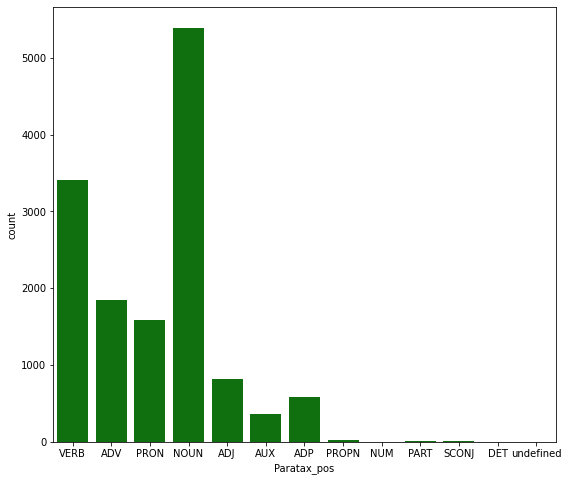

In [ ]:
plt.figure(figsize=(9, 8))
sns.countplot(x='Paratax_pos', data=df, color='g')
plt.show()

As can be seen from the granph above, the largest number of parentheticals in our sample are headed by nouns. However, this is not exactly true, since syntax analysis in spacy is based on the dependency grammar, so all the PPs are treated as headed by nouns. Costructions headed by verbs represent a second-largest class. The table below gives some examples of this type of construction:

In [ ]:
df[df["Paratax_pos"] == "VERB"]

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче в соседнем кабинете обнаружился молод...
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка в диагнозе ...
17,77,может_быть,художественная,повесть,омонимия не снята,VERB,а как же так может быть что ты меня знаешь а ...,2,а как же так может_быть что ты меня знаешь а ...
18,85,так_сказать,художественная,рассказ,омонимия не снята,VERB,а как же патрон так сказать.. жора сидел на ...,2,а как же патрон так_сказать.. жора сидел на ...
...,...,...,...,...,...,...,...,...,...
14059,47224,может_быть,нехудожественная | церковно-богословская,беседа,омонимия снята,VERB,я читаю евангелие и вдруг вижу каков может быт...,2,я читаю евангелие и вдруг вижу каков может_быт...
14061,47232,может_быть,нехудожественная | учебно-научная,статья,омонимия снята,VERB,явление гидроэлектрохимического импеданса 4 мо...,2,явление гидроэлектрохимического импеданса 4 мо...
14062,47234,понимаете_ли,художественная,пьеса,омонимия не снята,VERB,является посреди ночи какойто гестаповец вруча...,2,является посреди ночи какойто гестаповец вруча...
14063,47238,дай_бог,художественная,рассказ,омонимия снята,VERB,язва там или не дай бог ещё чегонибудь может п...,2,язва там или не дай_бог ещё чегонибудь может п...


However, the plot above represents information on the token-frequency of different types of parantheticals. Let us observe type-frequency of "noun"-, verb and adverbial-headed parentheticals. To do this, it is needed to delite all the dublicates in the "expression" column. 

In [ ]:
df1 = df.drop_duplicates(subset=['expression'])
df1 

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче в соседнем кабинете обнаружился молод...
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,но максимке нужен друг прежде_всего ему нуж...
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,а того что я и сам был поваром и знаю что к_чему
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка в диагнозе ...
...,...,...,...,...,...,...,...,...,...
14033,47112,к_своему_стыду,нехудожественная | публицистика,статья,омонимия не снята,NOUN,я стал изучать литературу и к своему стыду обн...,3,я стал изучать литературу и к_своему_стыду обн...
14041,47137,хвала_господу,художественная,пьеса,омонимия не снята,VERB,я тебя слушала теперь терпение лопнуло. он у ...,2,я тебя слушала теперь терпение лопнуло. он у ...
14048,47169,можно_сказать_к_чему,художественная,рассказ,омонимия не снята,ADV,я уж лучше в темноте я лучше у окошечка посижу...,4,я уж лучше в темноте я лучше у окошечка посижу...
14072,47271,ясное_дело_как_правило,публицистика,статья,омонимия не снята,NOUN,ясное дело государство всегда пыталось и как ...,4,ясное дело государство всегда пыталось и как ...


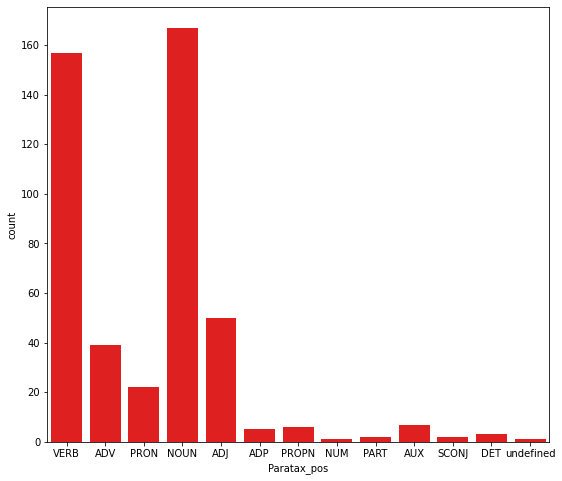

In [ ]:
plt.figure(figsize=(9, 8))
sns.countplot(x='Paratax_pos', data=df1, color='r')
plt.show()

It is evident that parentheticals headed by verbs and nouns or prepositions are also most frequent in the sense of type frequency. Now we can also count most frequent verbs and nouns that serve as a basis for parentheticals in Russian.

In [ ]:
def head (x):
  if type(x) == str:
    res = re.search('_',x)
    if res:
      x1 = x.split("_")
      x2 = ' '.join(x1)
    else:
      x2 = x
    d = nlp(str(x2))
    for token in d:
      dep = token.dep_
      if dep == "ROOT":
        res1 = token.text
  else:
    res1 = 'undefined'
  return res1

In [ ]:
df1["heads"] = df1["expression"].apply(lambda x: head(x))
df1

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined,heads
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче в соседнем кабинете обнаружился молод...,говорится
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,но максимке нужен друг прежде_всего ему нуж...,прежде
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,а того что я и сам был поваром и знаю что к_чему,чему
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...,видите
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка в диагнозе ...,может
...,...,...,...,...,...,...,...,...,...,...
14033,47112,к_своему_стыду,нехудожественная | публицистика,статья,омонимия не снята,NOUN,я стал изучать литературу и к своему стыду обн...,3,я стал изучать литературу и к_своему_стыду обн...,стыду
14041,47137,хвала_господу,художественная,пьеса,омонимия не снята,VERB,я тебя слушала теперь терпение лопнуло. он у ...,2,я тебя слушала теперь терпение лопнуло. он у ...,хвала
14048,47169,можно_сказать_к_чему,художественная,рассказ,омонимия не снята,ADV,я уж лучше в темноте я лучше у окошечка посижу...,4,я уж лучше в темноте я лучше у окошечка посижу...,можно
14072,47271,ясное_дело_как_правило,публицистика,статья,омонимия не снята,NOUN,ясное дело государство всегда пыталось и как ...,4,ясное дело государство всегда пыталось и как ...,правило


In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [58]:
cloud = WordCloud(background_color="white", max_words=2000, width=500, height=400)

In [29]:
subset = df1.loc[df1["Paratax_pos"] == "VERB", 'heads']

In [39]:
subs =pd.DataFrame(subset)
subs

,heads
0,говорится
3,видите
4,может
18,сказать
21,кажется
...,...
13709,может
13796,может
13951,может
14022,говоря


In [40]:
fake_text = " ".join(subs["heads"].to_list())

In [59]:
cloud.generate(fake_text)

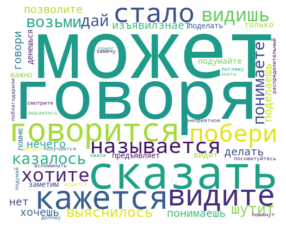

In [60]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## **4. Classification** ##

In this section I'm going to try a classfication of parantheticals in the sample based on the information of embeddings. First, let us prepare our corpus for vectorization and delite any stopwords.

In [ ]:
STOPWORDS = set(stopwords.words('russian'))
def text_stops(text):
  spltd = text.split(' ')
  for s in spltd:
    if s in STOPWORDS:
      spltd.remove(s)
  new = " ".join(spltd)
  return new

In [ ]:
df["context_joined"] = df["context_joined"].apply(lambda x: text_stops(x))

In [ ]:
df

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче соседнем кабинете обнаружился молодой...
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,максимке нужен друг прежде_всего нужна мать...
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,того я сам поваром знаю к_чему
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка диагнозе ме...
...,...,...,...,...,...,...,...,...,...
14071,47263,может_быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2,ясно район имевший центре повсеместно сумму па...
14072,47271,ясное_дело_как_правило,публицистика,статья,омонимия не снята,NOUN,ясное дело государство всегда пыталось и как ...,4,ясное дело государство пыталось как правило э...
14073,47275,ясное_дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2,ясное_дело пострелять контрольный голову натуре
14074,47281,меж_тем,нехудожественная | публицистика,статья,омонимия не снята,PRON,ястреб меж тем кружа надо мною все еще зловеще...,2,ястреб меж_тем кружа мною еще зловеще клекотал.


Now it is time to tokenize the contexts. As was mentioned before, I decided not to lemmatize the sentences form the corpus to preserve some grammatical information. This is still not a doubtless decision, so it maybe worth it to do the same research on a lemmatized corpus after.

In [ ]:
def tokenization(x):
  tokens = x.split(' ')
  tokens = [x for x in tokens if x]
  return tokens

In [ ]:
df["tokenized"] = df["context_joined"].apply(lambda x: tokenization(x))

In [ ]:
df

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined,tokenized
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче соседнем кабинете обнаружился молодой...,"[короче, соседнем, кабинете, обнаружился, моло..."
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,максимке нужен друг прежде_всего нужна мать...,"[максимке, нужен, друг, прежде_всего, нужна, м..."
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,того я сам поваром знаю к_чему,"[того, я, сам, поваром, знаю, к_чему]"
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...,"[видите_ли, сергей, васильевич, беззащитно, ул..."
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка диагнозе ме...,"[врачи, драматизируют, ерунда, ошибка, диагноз..."
...,...,...,...,...,...,...,...,...,...,...
14071,47263,может_быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2,ясно район имевший центре повсеместно сумму па...,"[ясно, район, имевший, центре, повсеместно, су..."
14072,47271,ясное_дело_как_правило,публицистика,статья,омонимия не снята,NOUN,ясное дело государство всегда пыталось и как ...,4,ясное дело государство пыталось как правило э...,"[ясное, дело, государство, пыталось, как, прав..."
14073,47275,ясное_дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2,ясное_дело пострелять контрольный голову натуре,"[ясное_дело, пострелять, контрольный, голову, ..."
14074,47281,меж_тем,нехудожественная | публицистика,статья,омонимия не снята,PRON,ястреб меж тем кружа надо мною все еще зловеще...,2,ястреб меж_тем кружа мною еще зловеще клекотал.,"[ястреб, меж_тем, кружа, мною, еще, зловеще, к..."


Since while joining parantheticals from the same context I allowed concatination of 4 words as largest, now there some cases of non-real epressions of 4 tokens not present in the context. We need to delete them.

In [ ]:
def check(x, y):
  if x not in y:
    x = "ERROR"
  else:
    x = "OK"
  return x

In [ ]:
df["Status"] = df.apply(lambda x: check(x.expression, x.tokenized), axis=1)

In [ ]:
df

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined,tokenized,Status
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче соседнем кабинете обнаружился молодой...,"[короче, соседнем, кабинете, обнаружился, моло...",OK
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,максимке нужен друг прежде_всего нужна мать...,"[максимке, нужен, друг, прежде_всего, нужна, м...",OK
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,того я сам поваром знаю к_чему,"[того, я, сам, поваром, знаю, к_чему]",OK
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...,"[видите_ли, сергей, васильевич, беззащитно, ул...",OK
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка диагнозе ме...,"[врачи, драматизируют, ерунда, ошибка, диагноз...",OK
...,...,...,...,...,...,...,...,...,...,...,...
14071,47263,может_быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2,ясно район имевший центре повсеместно сумму па...,"[ясно, район, имевший, центре, повсеместно, су...",OK
14072,47271,ясное_дело_как_правило,публицистика,статья,омонимия не снята,NOUN,ясное дело государство всегда пыталось и как ...,4,ясное дело государство пыталось как правило э...,"[ясное, дело, государство, пыталось, как, прав...",ERROR
14073,47275,ясное_дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2,ясное_дело пострелять контрольный голову натуре,"[ясное_дело, пострелять, контрольный, голову, ...",OK
14074,47281,меж_тем,нехудожественная | публицистика,статья,омонимия не снята,PRON,ястреб меж тем кружа надо мною все еще зловеще...,2,ястреб меж_тем кружа мною еще зловеще клекотал.,"[ястреб, меж_тем, кружа, мною, еще, зловеще, к...",OK


In [ ]:
df = df.drop(np.where(df['Status'] == "ERROR")[0])

In [ ]:
del df["Status"]

It is time to build the embeddings.

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
data = df["tokenized"].to_list()
print(data[:30])

[['короче', 'соседнем', 'кабинете', 'обнаружился', 'молодой', 'грузин', 'шевелюрой', 'как_говорится', 'царапающей', 'потолок.'], ['максимке', 'нужен', 'друг', 'прежде_всего', 'нужна', 'мать', 'нормальная', 'сидящая', 'дома', 'мать'], ['того', 'я', 'сам', 'поваром', 'знаю', 'к_чему'], ['видите_ли', 'сергей', 'васильевич', 'беззащитно', 'улыбнулся', 'кузмин', 'ведь', 'прозе', 'писать', 'умею.'], ['врачи', 'драматизируют', 'ерунда', 'ошибка', 'диагнозе', 'меня', 'может_быть', 'никакого', 'серьезного', 'заболевания.'], ['–', 'зетов', 'труднее', 'мотивировать', 'традиционным', 'набором', 'стимулов', 'они', 'готовы', 'работать', 'на', 'одном', 'интересе', 'в_том_случае', 'разделяют', 'ценности', 'соответствующей', 'политической', 'силы.'], ['–', 'зеты', 'знают', 'хотят', 'пока', 'сами', 'это', 'попробуют', 'в_то_же_время', 'могут', 'следовать', 'моде', 'рекомендациям', 'френдов', 'социальных', 'сетей'], ['–', 'зеты', 'склонны', 'пренебрежительно', 'относиться', 'опыту', 'авторитету', 'старше

In [ ]:
%time model_paratax = gensim.models.Word2Vec(data, size=500, window=5, min_count=1)

2021-12-07 06:52:35,517 : INFO : collecting all words and their counts
2021-12-07 06:52:35,519 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-12-07 06:52:35,592 : INFO : PROGRESS: at sentence #10000, processed 151022 words, keeping 54910 word types
2021-12-07 06:52:35,619 : INFO : collected 68012 word types from a corpus of 205141 raw words and 13322 sentences
2021-12-07 06:52:35,621 : INFO : Loading a fresh vocabulary
2021-12-07 06:52:35,760 : INFO : effective_min_count=1 retains 68012 unique words (100% of original 68012, drops 0)
2021-12-07 06:52:35,762 : INFO : effective_min_count=1 leaves 205141 word corpus (100% of original 205141, drops 0)
2021-12-07 06:52:36,004 : INFO : deleting the raw counts dictionary of 68012 items
2021-12-07 06:52:36,007 : INFO : sample=0.001 downsamples 11 most-common words
2021-12-07 06:52:36,008 : INFO : downsampling leaves estimated 201554 word corpus (98.3% of prior 205141)
2021-12-07 06:52:36,234 : INFO : estimated r

CPU times: user 25 s, sys: 532 ms, total: 25.6 s
Wall time: 21.1 s


In [ ]:
print(sorted([w for w in model_paratax.wv.vocab]))

['\t', '#', '$', '$$#', '*', '***', '*петра*', '.', '..', '0', '0%', '0.', '00.', '000', '000.', '01021', '02:', '03', '03038', '039', '0462%', '050', '06', '0722%', '09', '1', '1%', '1%.', '1.', '1.1', '10', '10%', '10%.', '10.', '100', '100%', '100%.', '100.', '1000', '10000', '100000', '100150', '100°', '100кратного', '100процентную', '1012°', '101м.', '102', '104', '105', '107', '109.', '1092', '10\xa0', '10летняя', '10мегатонной', '10метровой', '11', '11%', '11%.', '11.', '1100', '11076428', '111', '1112', '113', '117', '11е', '12', '12%.', '12.', '120', '1200', '121', '1212', '122', '125', '127', '128', '12:', '12летним', '13', '13%', '13.', '13.01', '130', '1300', '133', '136', '137', '1375', '1379', '1397', '13процентный', '14', '14.', '140', '1400', '1408', '142', '145', '146', '147', '1470', '14го', '15', '15%', '15%.', '15%ный', '15.', '150', '150°', '150мегаваттных', '1515', '153', '1530', '15309', '154', '1550е', '1560е.', '158', '158.', '15902.', '15:', '15‑', '16', '16.'

To classify the parantheticals it is required to extract a vector corresponding to each paranthetical and to map it to into the dataframe.

In [ ]:
def vector(x):
  vect = model_paratax[x]
  return vect

In [ ]:
df["vect_BOW"] = df["expression"].apply(lambda x: vector(x))

In [ ]:
df

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined,tokenized,vect_BOW
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче соседнем кабинете обнаружился молодой...,"[короче, соседнем, кабинете, обнаружился, моло...","[-0.0020781753, -0.00013320589, -0.017577276, ..."
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,максимке нужен друг прежде_всего нужна мать...,"[максимке, нужен, друг, прежде_всего, нужна, м...","[-0.010160248, 0.0037255068, -0.095250905, -0...."
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,того я сам поваром знаю к_чему,"[того, я, сам, поваром, знаю, к_чему]","[-0.0021679762, 0.00036877414, -0.026439615, -..."
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...,"[видите_ли, сергей, васильевич, беззащитно, ул...","[-0.0009063903, 0.00036923497, -0.008817031, 0..."
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка диагнозе ме...,"[врачи, драматизируют, ерунда, ошибка, диагноз...","[-0.0123809, 0.0047463174, -0.11502059, -0.002..."
...,...,...,...,...,...,...,...,...,...,...,...
14067,47252,как_правило,нехудожественная | публицистика,статья,омонимия не снята,NOUN,ярость как правило изливается на пришельцев уг...,2,ярость как_правило изливается пришельцев угрож...,"[ярость, как_правило, изливается, пришельцев, ...","[-0.007846317, 0.0018700056, -0.07131185, -0.0..."
14069,47258,таким_образом,нехудожественная | публицистика,статья,омонимия снята,NOUN,ясно что деньги которые ближайшее окружение ел...,2,ясно деньги которые ближайшее окружение ельцин...,"[ясно, деньги, которые, ближайшее, окружение, ...","[-0.0108215725, 0.003266587, -0.08351322, -0.0..."
14071,47263,может_быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2,ясно район имевший центре повсеместно сумму па...,"[ясно, район, имевший, центре, повсеместно, су...","[-0.0123809, 0.0047463174, -0.11502059, -0.002..."
14073,47275,ясное_дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2,ясное_дело пострелять контрольный голову натуре,"[ясное_дело, пострелять, контрольный, голову, ...","[-0.001340095, -0.00062466355, -0.002536049, -..."


Now when we have a dataframe with parentheticals and the corresponding vectors, we can apply the K-means method for classification.

In [ ]:
X = df['vect_BOW'].to_list()

In [ ]:
X = np.array(X)

In [ ]:
X

array([[-2.0781753e-03, -1.3320589e-04, -1.7577276e-02, ...,
        -2.2223617e-03,  1.2711776e-04, -3.4959700e-03],
       [-1.0160248e-02,  3.7255068e-03, -9.5250905e-02, ...,
        -5.6525921e-03, -3.5561921e-04, -1.8584989e-02],
       [-2.1679762e-03,  3.6877414e-04, -2.6439615e-02, ...,
        -1.2851408e-03, -9.9121076e-05, -5.4313997e-03],
       ...,
       [-1.2380900e-02,  4.7463174e-03, -1.1502059e-01, ...,
        -8.5284235e-03, -1.1665277e-03, -2.1949366e-02],
       [-1.3400950e-03, -6.2466355e-04, -2.5360491e-03, ...,
        -1.0935416e-03, -3.1023365e-04, -5.0138984e-05],
       [ 2.2879029e-04, -6.9949652e-05, -1.7885357e-03, ...,
         3.1296493e-04,  8.7590062e-04,  5.0636224e-04]], dtype=float32)

In [ ]:
from sklearn.cluster import KMeans

Let's choose 6 clases for the beginning.

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

In [ ]:
kmeans6 = kmeans.labels_

In [ ]:
df["kmeans6"] = kmeans6

In [ ]:
df

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined,tokenized,vect_BOW,kmeans6
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче соседнем кабинете обнаружился молодой...,"[короче, соседнем, кабинете, обнаружился, моло...","[-0.0020781753, -0.00013320589, -0.017577276, ...",1
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,максимке нужен друг прежде_всего нужна мать...,"[максимке, нужен, друг, прежде_всего, нужна, м...","[-0.010160248, 0.0037255068, -0.095250905, -0....",4
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,того я сам поваром знаю к_чему,"[того, я, сам, поваром, знаю, к_чему]","[-0.0021679762, 0.00036877414, -0.026439615, -...",1
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...,"[видите_ли, сергей, васильевич, беззащитно, ул...","[-0.0009063903, 0.00036923497, -0.008817031, 0...",5
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка диагнозе ме...,"[врачи, драматизируют, ерунда, ошибка, диагноз...","[-0.0123809, 0.0047463174, -0.11502059, -0.002...",2
...,...,...,...,...,...,...,...,...,...,...,...,...
14067,47252,как_правило,нехудожественная | публицистика,статья,омонимия не снята,NOUN,ярость как правило изливается на пришельцев уг...,2,ярость как_правило изливается пришельцев угрож...,"[ярость, как_правило, изливается, пришельцев, ...","[-0.007846317, 0.0018700056, -0.07131185, -0.0...",0
14069,47258,таким_образом,нехудожественная | публицистика,статья,омонимия снята,NOUN,ясно что деньги которые ближайшее окружение ел...,2,ясно деньги которые ближайшее окружение ельцин...,"[ясно, деньги, которые, ближайшее, окружение, ...","[-0.0108215725, 0.003266587, -0.08351322, -0.0...",0
14071,47263,может_быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2,ясно район имевший центре повсеместно сумму па...,"[ясно, район, имевший, центре, повсеместно, су...","[-0.0123809, 0.0047463174, -0.11502059, -0.002...",2
14073,47275,ясное_дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2,ясное_дело пострелять контрольный голову натуре,"[ясное_дело, пострелять, контрольный, голову, ...","[-0.001340095, -0.00062466355, -0.002536049, -...",5


In [ ]:
import matplotlib.pyplot as plt

To get a better undertanding of the result it worth it to make a visualization.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
y = df["kmeans6"].to_list()

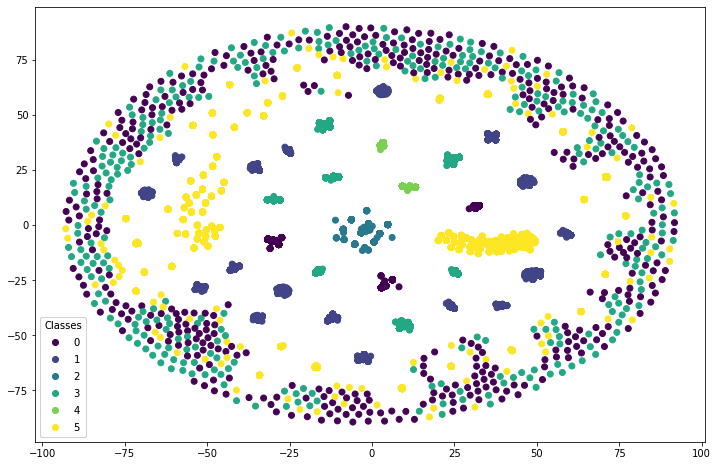

In [ ]:
embeddings = TSNE(n_components=2)
Y = embeddings.fit_transform(df['vect_BOW'].to_list())
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
scatter = ax.scatter(Y[:, 0], Y[:, 1], c=y)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

As can be seen from the plot above, our clastering was not ver successful, but absolutely disastrous was it neither. At least, it is possible to say that what was classified as the fifth class makes up about two separate groups. The fourh class is comparatively small and compact. Some expressions fro the first class tend to grpup somehow, but generally they are quite scattered. Let's look on some of the suggested classes.

The first class is the one labelled as yellow in the plot.

In [ ]:
a_possible_class = df.loc[df["kmeans6"] == 5, 'expression'].value_counts()

In [ ]:
a_possible_class 

в_сущности               87
иными_словами            84
стало_быть               77
в_таком_случае           77
в_любом_случае           76
                         ..
никуда_не_деться          1
без_всякого_намерения     1
в_общем_разные            1
со_слов_николая           1
право_слово               1
Name: expression, Length: 257, dtype: int64

Actually, it looks like the expressions brought together into this class have somthing in common indeed. At least first two most common expressions can be described as introducing reformulation.

The next possible class is the one labelled dark-blue in the picture.

In [ ]:
a_possible_class2 = df.loc[df["kmeans6"] == 1, 'expression'].value_counts()
a_possible_class2

можно_сказать       229
как_известно        213
в_принципе          212
конечно_же          183
к_чему              175
на_мой_взгляд       167
во_всяком_случае    163
в_самом_деле        155
между_прочим        146
слава_богу          133
так_сказать         131
надо_сказать        130
в_этом_случае       121
к_слову             114
быть_может          114
так_или_иначе       107
как_говорится       102
Name: expression, dtype: int64

Again, it looks like the obtained list is not absolutelly random. It can be stated (in a purelly imprionistic manner) that all these expressions serve to add some side information to the current discussion.

And finally, let's have a look at the fourth class.

In [ ]:
a_possible_class3 = df.loc[df["kmeans6"] == 4, 'expression'].value_counts()
a_possible_class3

прежде_всего    637
в_частности     562
Name: expression, dtype: int64

From the picture above it was clear, that 6 classes is not enough, so lets do clasterizaton with 12 classes.

In [ ]:
kmeans_20 = KMeans(n_clusters=12, random_state=0).fit(X)

In [ ]:
kmeans12 = kmeans_20.labels_

In [ ]:
df["kmeans12"] = kmeans12
df

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined,tokenized,vect_BOW,kmeans6,kmeans12
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче соседнем кабинете обнаружился молодой...,"[короче, соседнем, кабинете, обнаружился, моло...","[-0.0020781753, -0.00013320589, -0.017577276, ...",1,7
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,максимке нужен друг прежде_всего нужна мать...,"[максимке, нужен, друг, прежде_всего, нужна, м...","[-0.010160248, 0.0037255068, -0.095250905, -0....",4,0
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,того я сам поваром знаю к_чему,"[того, я, сам, поваром, знаю, к_чему]","[-0.0021679762, 0.00036877414, -0.026439615, -...",1,5
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...,"[видите_ли, сергей, васильевич, беззащитно, ул...","[-0.0009063903, 0.00036923497, -0.008817031, 0...",5,1
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка диагнозе ме...,"[врачи, драматизируют, ерунда, ошибка, диагноз...","[-0.0123809, 0.0047463174, -0.11502059, -0.002...",2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14067,47252,как_правило,нехудожественная | публицистика,статья,омонимия не снята,NOUN,ярость как правило изливается на пришельцев уг...,2,ярость как_правило изливается пришельцев угрож...,"[ярость, как_правило, изливается, пришельцев, ...","[-0.007846317, 0.0018700056, -0.07131185, -0.0...",0,10
14069,47258,таким_образом,нехудожественная | публицистика,статья,омонимия снята,NOUN,ясно что деньги которые ближайшее окружение ел...,2,ясно деньги которые ближайшее окружение ельцин...,"[ясно, деньги, которые, ближайшее, окружение, ...","[-0.0108215725, 0.003266587, -0.08351322, -0.0...",0,4
14071,47263,может_быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2,ясно район имевший центре повсеместно сумму па...,"[ясно, район, имевший, центре, повсеместно, су...","[-0.0123809, 0.0047463174, -0.11502059, -0.002...",2,3
14073,47275,ясное_дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2,ясное_дело пострелять контрольный голову натуре,"[ясное_дело, пострелять, контрольный, голову, ...","[-0.001340095, -0.00062466355, -0.002536049, -...",5,6


And now let's visualize it again.

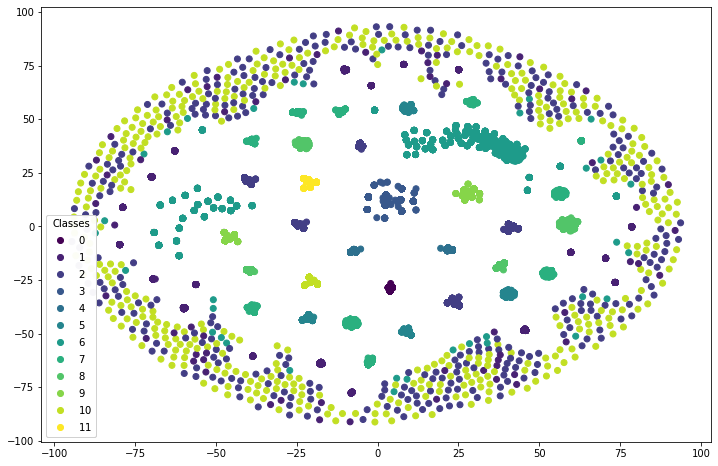

In [ ]:
embeddings = TSNE(n_components=2)
Y = embeddings.fit_transform(df['vect_BOW'].to_list())
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
scatter = ax.scatter(Y[:, 0], Y[:, 1], c=kmeans12)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

The second plot looks better than the first one, but it still fails to bring together small groups. At this stage I preffered to quit with embeddings. It is clear, that there are a lot of ways to make the classification more precise. But this is out of the scope of the present work. I showed as was planned that the classification of parentheticals based on the embeddings information is possibele, although making it more efficient tool requires a lot of additional work.

## **5. Sentiment**

Since parentheticals reflect some attitudinal modality of the expression it may help to check the sentiment of the parentheticals. Hovewer, since we don't have our own labeled sample, we have to use a pre-trained model.

In [ ]:
! python -m dostoevsky download fasttext-social-network-model

In [ ]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [ ]:
tokenizer = RegexTokenizer()

In [ ]:
print(results)

[{'speech': 1.0000100135803223, 'skip': 0.0020607432816177607}, {'positive': 0.9886782765388489, 'skip': 0.005394937004894018}, {'negative': 0.9525841474533081, 'neutral': 0.13661839067935944}]


In [ ]:
df["tonality"] = df["Context"].apply(lambda x: model.predict(x, k=2))

In [ ]:
df

,Unnamed: 0,expression,Sphere,Type,Ambiguity,Paratax_pos,Context,lenght,context_joined,tokenized,vect_BOW,kmeans6,tonality
0,0,как_говорится,публицистика,мемуары,омонимия не снята,VERB,короче в соседнем кабинете обнаружился молод...,2,короче соседнем кабинете обнаружился молодой...,"[короче, соседнем, кабинете, обнаружился, моло...","[0.0077121, 0.013331049, 0.004961698, -0.00879...",4,"[{'neutral': 1.0000100135803223, 'negative': 1..."
1,4,прежде_всего,нехудожественная | публицистика,статья,омонимия снята,ADV,но максимке нужен друг прежде всего ему нуж...,2,максимке нужен друг прежде_всего нужна мать...,"[максимке, нужен, друг, прежде_всего, нужна, м...","[0.042808387, 0.06913719, 0.024825692, -0.0459...",5,"[{'neutral': 1.0000100135803223, 'negative': 1..."
2,6,к_чему,художественная,роман,омонимия не снята,PRON,а того что я и сам был поваром и знаю что к чему,2,того я сам поваром знаю к_чему,"[того, я, сам, поваром, знаю, к_чему]","[0.011756738, 0.0198764, 0.007255179, -0.01186...",4,"[{'neutral': 1.0000100135803223, 'negative': 1..."
3,18,видите_ли,нехудожественная | публицистика,дневник| записные книжки,омонимия не снята,VERB,видите ли сергей васильевич беззащитно улыбн...,2,видите_ли сергей васильевич беззащитно улыбн...,"[видите_ли, сергей, васильевич, беззащитно, ул...","[0.0036261696, 0.0060077426, 0.0015499044, -0....",0,"[{'neutral': 1.0000100135803223, 'negative': 1..."
4,20,может_быть,нехудожественная | публицистика,статья,омонимия не снята,VERB,врачи драматизируют ерунда ошибка в диагнозе ...,2,врачи драматизируют ерунда ошибка диагнозе ме...,"[врачи, драматизируют, ерунда, ошибка, диагноз...","[0.05242632, 0.082074694, 0.027920036, -0.0548...",3,"[{'neutral': 1.0000100135803223, 'negative': 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14067,47252,как_правило,нехудожественная | публицистика,статья,омонимия не снята,NOUN,ярость как правило изливается на пришельцев уг...,2,ярость как_правило изливается пришельцев угрож...,"[ярость, как_правило, изливается, пришельцев, ...","[0.034745425, 0.0539847, 0.017989052, -0.03544...",1,"[{'neutral': 1.0000100135803223, 'negative': 1..."
14069,47258,таким_образом,нехудожественная | публицистика,статья,омонимия снята,NOUN,ясно что деньги которые ближайшее окружение ел...,2,ясно деньги которые ближайшее окружение ельцин...,"[ясно, деньги, которые, ближайшее, окружение, ...","[0.038667362, 0.061137605, 0.019544026, -0.040...",1,"[{'neutral': 1.0000100135803223, 'negative': 1..."
14071,47263,может_быть,художественная,рассказ,омонимия не снята,VERB,ясно что район имевший в центре и повсеместно ...,2,ясно район имевший центре повсеместно сумму па...,"[ясно, район, имевший, центре, повсеместно, су...","[0.05242632, 0.082074694, 0.027920036, -0.0548...",3,"[{'neutral': 1.0000100135803223, 'negative': 1..."
14073,47275,ясное_дело,художественная,анекдот,омонимия не снята,NOUN,ясное дело пострелять там контрольный в голову...,2,ясное_дело пострелять контрольный голову натуре,"[ясное_дело, пострелять, контрольный, голову, ...","[0.00054127065, 0.0022925183, 0.00063582906, -...",0,"[{'neutral': 1.0000100135803223, 'negative': 1..."


In [ ]:
def define_tonality(x):
  max = sorted(x[0].values())[0]
  for key,value in x[0].items():
    if value==max:
      ton = key
  return ton

In [ ]:
df["tonality_upd"] = df["tonality"].apply(lambda x: define_tonality(x))

In [ ]:
df["tonality_upd"].value_counts()

negative    11827
skip         1193
neutral       302
Name: tonality_upd, dtype: int64

As can be seen from the result, the absolute majority of the constructions were classified as having negative tonality and all the other were either undefined or neutral. This result is not unambigious, since it is possible to sugest both that the model was uncussessful or that all our constructins indeed have negative sentiment. In any case this try didn't bring a lot of result.

## **5.Conclusions** ##

In this work I have tried to check if one can use embeddings to classify parentheticals in Russian. The obtained result shows that although this task seems to be hopeless, we still can get a somewhat meaningfull result. However this is crutial for this task that if we want to proceed with the unsupervised learning we should come up with some creteria to judge our classification. Only after that this will make sense to continue with experiments.